In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

C:\Users\wl030\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\wl030\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
C:\Users\wl030\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
from sqlalchemy import func
max_date_q = session.query(Measurement, func.max(Measurement.date).label('maxdate'))

for m in max_date_q:
    maxdate=(dt.datetime.strptime(m.maxdate,'%Y-%m-%d'))
mindate = maxdate -dt.timedelta(days=365)
date_list = []
pcrp_list = []
last_year_query = session.query(Measurement).filter(Measurement.date >= mindate)
for m in last_year_query:
    date_list.append(m.date)
    pcrp_list.append(m.prcp) 
last_year_df = pd.DataFrame({"prcp" : pcrp_list, 'date':date_list})

#WL - Drop NA
last_year_df.dropna()

#wl sort values
last_year_df.sort_values(by='date',ascending = True)


,prcp,date
0,0.08,2016-08-24
1006,NaN,2016-08-24
1524,2.15,2016-08-24
702,2.28,2016-08-24
360,2.15,2016-08-24
1875,1.45,2016-08-24
1188,1.22,2016-08-24
1,0.08,2016-08-25
1007,0.00,2016-08-25
1525,0.06,2016-08-25


In [13]:
last_year_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
###WL-Dataframe used in graph
days_df = last_year_df.groupby(by='date').mean()


In [15]:
days_df.describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


C:\Users\wl030\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


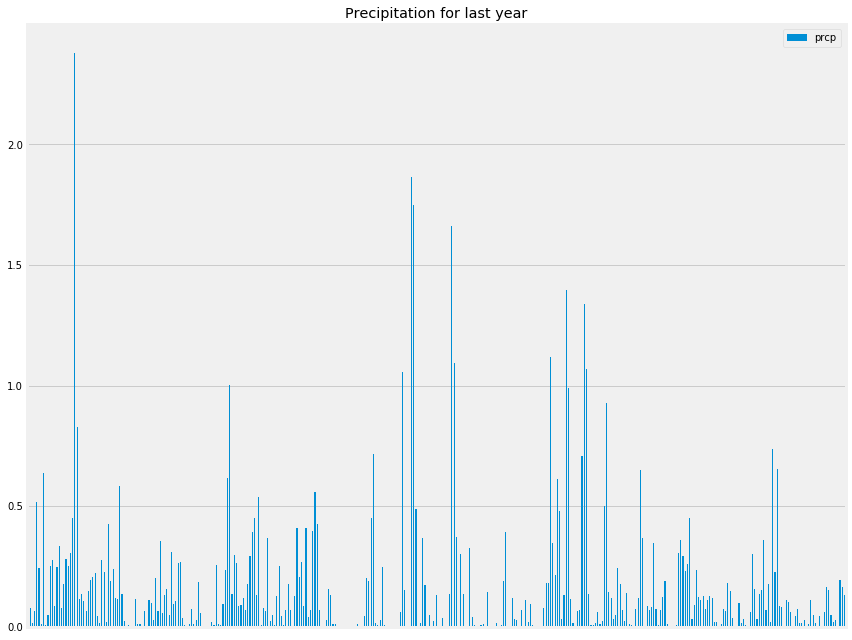

In [16]:
days_df.plot.bar(title = 'Precipitation for last year', figsize = [12,10])
plt.tight_layout()

###WL - turns off xlabal
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()

###WL - BUG: graph is wrong

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
###WL - BUG: count is wrong
last_year_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
###WL-NOTE: THis is without the 1 year min filter
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Measurement).group_by(Measurement.station).count()
print(num_stations)

9


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import func, desc
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('total')) \
    .group_by(Measurement.station).order_by(desc('total'))

for a in active_stations:
    print(a)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station_detail=session.query(Measurement.station,func.min(Measurement.tobs)\
    , func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .group_by(Measurement.station).filter(Measurement.station=='USC00519281')
for sd in station_detail:
    print(sd)

('USC00519281', 54.0, 85.0, 71.66378066378067)


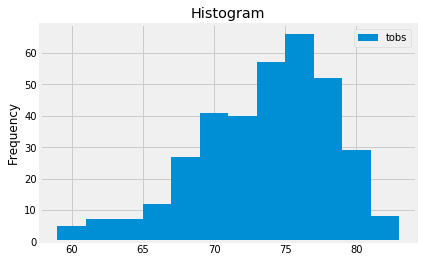

In [21]:
###WL
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_tobs = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= mindate) \
    .filter(Measurement.station == 'USC00519281')
t_date = []
t_tobs = []
for t in last_year_tobs:
    t_date.append(t.date)
    t_tobs.append(t.tobs)


fig, ax1 = plt.subplots()
ax1.hist(t_tobs, bins=12, label='tobs')
legend = plt.legend(loc='best')
plt.title('Histogram')

ax1.set_ylabel('Frequency')
plt.show()

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps(mindate, maxdate))
###WL - BUG: values are incorrect from homework example, but are correct for the given data and period.


[(58.0, 74.57894736842105, 87.0)]


Text(0.5, 1, 'Trip Avg Temp')

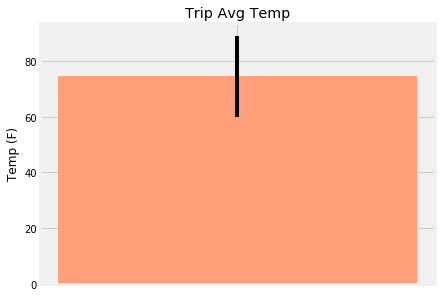

In [53]:
###WL - BUG: graph looks funny
###WL - BUG: values are wrong.  More specifically the yerr is incorrect.  I double checked TMAX(== 87) and TMIN(==58) values 
###WL - are correct, but not displaying correctly.  FIXED: I divided TMAX-TMIN by 2.
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#TMIN, TAVE, TMAX 

temp=calc_temps(mindate, maxdate)
TMIN = temp[0][0]
TAVE= temp[0][1]
TMAX = temp[0][2]
yerr = (TMAX-TMIN)/2

fig, ax2 = plt.subplots()

ax2.bar(x=[''],height=[TAVE],color='lightsalmon', yerr=yerr, align='center', width=0.2)

fig.tight_layout()
ax2.set_ylabel('Temp (F)')
plt.title('Trip Avg Temp')



In [27]:
###WL
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

q = session.query(Measurement,Station) \
    .filter(Measurement.date >= mindate) \
    .filter(Measurement.station == Station.station) \
    .group_by(Measurement.station) \
    .order_by(desc(Measurement.prcp)) \
    .all()

for x in q:
    print(x.measurement.station,x.station.name, x.station.latitude \
        , x.station.longitude \
        , x.station.elevation
         )

USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9


## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Use the start and end date to create a range of dates
#print(dt.date(2017, 1 ,31))
start_dt = dt.date(2018,1,1)
end_dt = dt.date(2018,1,5)

In [30]:
# Use the start and end date to create a range of dates
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
        

###WL-output a range of dates
date_list = []

for dt in daterange(start_dt,end_dt):
    #date_list.append(dt.strftime("%y-%m-%d"))
    date_list.append(dt) #output: [datetime.date(2018, 1, 1), datetime.date(2018, 1, 2), datetime.date(2018, 1, 3), datetime.date(2018, 1, 4), datetime.date(2018, 1, 5)]
print(date_list)

[datetime.date(2018, 1, 1), datetime.date(2018, 1, 2), datetime.date(2018, 1, 3), datetime.date(2018, 1, 4), datetime.date(2018, 1, 5)]


In [31]:
# Stip off the year and save a list of %m-%d strings
month_list =[] #output
for d in date_list:
    month_list.append(d.strftime('%m-%d'))
    
print(month_list)


['01-01', '01-02', '01-03', '01-04', '01-05']


In [54]:
# Loop through the list of %m-%d strings and calculate the normals for each date

tmin_list=[]
tavg_list=[]
tmax_list=[]
for x in month_list:
    sublist = daily_normals(x)
    for y in sublist:
        tmin_list.append(y[0])
        tavg_list.append(y[1])
        tmax_list.append(y[2])

print(tmin_list)
print(tavg_list)
print(tmax_list)

[62.0, 60.0, 62.0, 58.0, 56.0]
[69.15384615384616, 69.39622641509433, 68.9090909090909, 70.0, 67.96428571428571]
[77.0, 77.0, 77.0, 76.0, 76.0]


In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
t_df = pd.DataFrame({'tmin' :tmin_list
                    , 'tavg':tavg_list
                    , 'tmax':tmax_list}
                    
                    ,index = date_list)
t_df.head()

,tmin,tavg,tmax
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


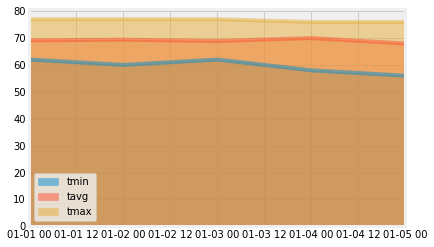

In [34]:
# Plot the daily normals as an area plot with `stacked=False`
t_df.plot(stacked=False, kind='area')